In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Placing the csv in a pandas dataframe:

In [8]:
arrival_df = pd.read_csv('data.csv')

In [9]:
arrival_df.head()

,8:56 AM,9:00 AM,7:45 AM,7:45 AM.1,8:05 AM,7:45 AM.2
0,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
1,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
2,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
3,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
4,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM


I can see two corrections that I need to make:
1. I need to set a header row for my data so I do not lose the inital row. To not just replace that row, I am going to reload the dataframe with a given set of column names.
2. I will have to reshape it in some way to look at the time values. My plan is to then take my dataframe and convert it into one Series with a simple list comprehension.

In [18]:
column_names =['Mon-1', 'Tues-1', 'Weds-1','Thurs-1','Fri-1', 'Mon-2']
arrival_df = pd.read_csv('data.csv', names=column_names)
arrival_df.head()

,Mon-1,Tues-1,Weds-1,Thurs-1,Fri-1,Mon-2
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


In [19]:
# Concatentating the rows into one column
arrival_series = pd.concat([arrival_df[i] for i in arrival_df.columns])
arrival_series.head()

'''
Miles' solution:
df_in_one_column = arrival_df.values.reshape(-1)

'''

0    8:56 AM
1    8:40 AM
2    8:45 AM
3    8:40 AM
4    8:55 AM
dtype: object

Yay! Much easier to play with now. Now, I am going to convert my Series into datetime objects

In [159]:
# schedule_single_df = pd.to_datetime(schedule_single_df)

By running the cell above, I realized there is a value of 'absent' for one day, messing up my time conversion. To correct, I am going to drop that row to make the rest of my data workable. I have mapped a function to find the value, replace it with a NaN value, then drop the NaN value.

In [24]:
# Changing 'absent' to NaN
arrival_series = arrival_series.map(lambda x: None if x == 'absent' else x)

'''
Miles solution:
def convert_to_time(value):
    try:
        time_value = pd.Timestamp(x).dt.strftime('%H:%M')
        return time_value
    except:
        return None

arrival_series = arrival_series.map(lambda x: convert_to_time(x))
- This approach makes sure that any other possible error values get changed into None
'''

# Dropping the NaN value row
arrival_series.dropna(inplace=True)

In [25]:
# Converting all the values to datetime objects
arrival_series = arrival_series.apply(lambda x: pd.Timestamp(x)).dt.strftime('%H:%M')

arrival_series.head()

0    08:56
1    08:40
2    08:45
3    08:40
4    08:55
dtype: object

In [26]:
arrival_count = arrival_series.value_counts().sort_index()

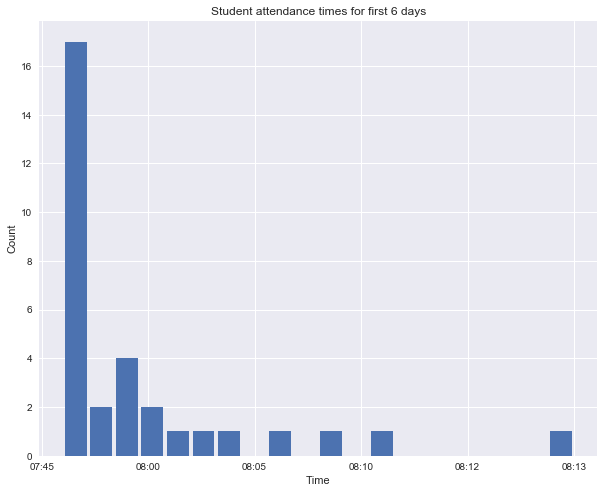

In [27]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))
num_bins = 20

ax.hist(arrival_count.values, num_bins, align='mid',rwidth=.85)
ax.set_title("Student attendance times for first 6 days")
ax.set_xlabel("Time")
ax.vlines(arrival_count.values.mean(), 1, 1)
ax.set_ylabel("Count")
ax.set_xticklabels(arrival_count.index)
plt.show()